In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv("/kaggle/input/breast-cancer-dataset/breast-cancer.csv")

In [4]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
df.drop("id",axis=1,inplace=True)

In [7]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
df.groupby("diagnosis")["radius_mean"].describe()

,count,mean,std,min,25%,50%,75%,max
diagnosis,,,,,,,,
B,357.0,12.146524,1.780512,6.981,11.080,12.200,13.37,17.85
M,212.0,17.462830,3.203971,10.950,15.075,17.325,19.59,28.11


In [9]:
df.groupby("diagnosis")["texture_mean"].describe()

,count,mean,std,min,25%,50%,75%,max
diagnosis,,,,,,,,
B,357.0,17.914762,3.995125,9.71,15.1500,17.39,19.760,33.81
M,212.0,21.604906,3.779470,10.38,19.3275,21.46,23.765,39.28


In [10]:
df.groupby("diagnosis")["perimeter_mean"].describe()

,count,mean,std,min,25%,50%,75%,max
diagnosis,,,,,,,,
B,357.0,78.075406,11.807438,43.79,70.870,78.18,86.100,114.6
M,212.0,115.365377,21.854653,71.90,98.745,114.20,129.925,188.5


In [11]:
def plot_boxplot(df,c):
    df.boxplot(column=[c])
    plt.grid(False)
    plt.show()

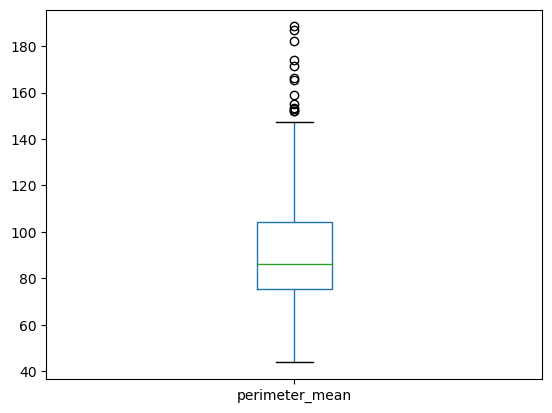

In [12]:
plot_boxplot(df,"perimeter_mean")

## Remove outlier

In [13]:
def outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    ls = df_in.index[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    return ls

In [14]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [15]:
index_list =[]
for i in range (1,len(df.columns)):
    index_list.extend(outlier(df,df.columns[i]))

In [16]:
index_list

[82,
 108,
 122,
 164,
 180,
 202,
 212,
 236,
 339,
 352,
 369,
 461,
 503,
 521,
 219,
 232,
 239,
 259,
 265,
 455,
 562,
 82,
 108,
 122,
 164,
 180,
 202,
 212,
 236,
 339,
 352,
 461,
 503,
 521,
 23,
 82,
 108,
 122,
 164,
 180,
 202,
 212,
 236,
 250,
 265,
 272,
 339,
 352,
 368,
 369,
 372,
 373,
 393,
 449,
 461,
 503,
 521,
 563,
 564,
 3,
 105,
 122,
 504,
 520,
 568,
 0,
 3,
 9,
 12,
 14,
 78,
 82,
 108,
 122,
 181,
 190,
 258,
 351,
 352,
 400,
 567,
 0,
 68,
 78,
 82,
 108,
 112,
 122,
 152,
 180,
 202,
 212,
 258,
 351,
 352,
 400,
 461,
 563,
 567,
 78,
 82,
 108,
 122,
 180,
 202,
 212,
 352,
 393,
 461,
 3,
 22,
 25,
 60,
 78,
 108,
 122,
 146,
 150,
 152,
 258,
 288,
 323,
 424,
 561,
 3,
 9,
 68,
 71,
 78,
 151,
 152,
 176,
 258,
 318,
 376,
 379,
 504,
 505,
 507,
 0,
 12,
 25,
 27,
 38,
 42,
 77,
 78,
 82,
 108,
 122,
 138,
 161,
 168,
 210,
 212,
 218,
 236,
 250,
 258,
 265,
 272,
 290,
 300,
 302,
 339,
 352,
 366,
 368,
 369,
 417,
 460,
 461,
 468,
 503,
 5

In [17]:
def remove (df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [18]:
df_clean = remove(df,index_list)

In [19]:
df_clean

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
10,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
11,M,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,...,20.42,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
13,M,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,B,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,...,13.89,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242
555,B,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283
558,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004
560,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321


In [20]:
df_clean.groupby("diagnosis")["perimeter_mean"].describe()

,count,mean,std,min,25%,50%,75%,max
diagnosis,,,,,,,,
B,300.0,79.713733,11.027227,43.79,73.0500,79.305,87.195,114.6
M,98.0,106.881429,14.965513,75.00,94.9425,104.600,118.400,137.8


In [21]:
x = df_clean.drop("diagnosis",axis=1)
y = df_clean["diagnosis"]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Random Forst Classifier

In [23]:
model_RF = RandomForestClassifier()

In [24]:
model_RF.fit(x_train,y_train)

RandomForestClassifier()

In [25]:
model_RF.score(x_test,y_test)

0.975

# Decision Tree Classifier

In [26]:
model_DT = DecisionTreeClassifier()

In [27]:
model_DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
model_DT.score(x_test,y_test)

0.9125

# Support Vector Classifier

In [29]:
model_svm = SVC()

In [30]:
model_svm.fit(x_train,y_train)

SVC()

In [31]:
model_svm.score(x_test,y_test)

0.9125

In [32]:
import joblib

In [35]:
joblib.dump(model_RF,"/kaggle/working/model_RF.h5")

['/kaggle/working/model_RF.h5']